In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df = df.query('age>18')
df.head(3)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0


In [ ]:
plt.rc('font', **{'size':18})

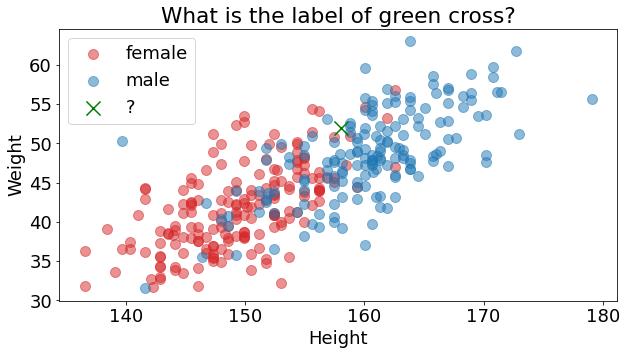

In [30]:
plt.figure(figsize=(10, 5))

plt.scatter(df.query("male==0")['height'], df.query("male==0")['weight'],
            c='tab:red', s=100, alpha=0.5, label='female')
plt.scatter(df.query("male==1")['height'], df.query("male==1")['weight'],
            c='tab:blue', s=100, alpha=0.5, label='male')
plt.scatter(158, 52, marker='x', s=200, color='green', label='?')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('What is the label of green cross?');

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
df_train, df_test = train_test_split(df, test_size=0.33, shuffle=True, random_state=1)

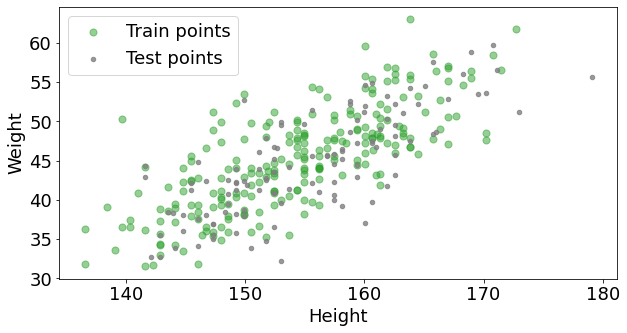

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(df_train['height'], df_train['weight'],
            c='tab:green', s=50, alpha=0.5, label='Train points')
plt.scatter(df_test['height'], df_test['weight'],
            c='tab:gray', s=20, alpha=0.8, label='Test points')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend();

# K = 1

In [7]:
X_train, y_train = df_train[['height', 'weight']], df_train['male']
X_test, y_test = df_test[['height', 'weight']], df_test['male']

In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

In [9]:
accuracy_score(y_train, y_pred_train)

1.0

In [10]:
accuracy_score(y_test, y_pred_test)

0.7739130434782608

# K = 2,3,4,...10

In [11]:
acc_test = []
acc_train = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    acc_test.append(accuracy_score(y_test, y_pred))
    acc_train.append(accuracy_score(y_train, y_pred_train))

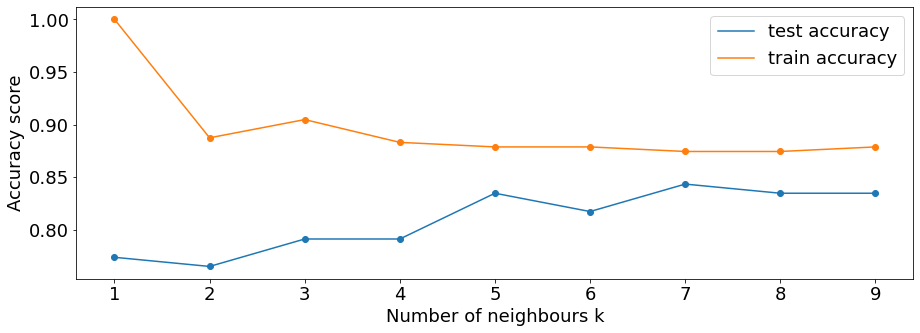

In [12]:
plt.figure(figsize=(15,5))

plt.plot(range(1,10), acc_test, label='test accuracy');
plt.plot(range(1,10), acc_train, label='train accuracy');

plt.scatter(range(1,10), acc_test);
plt.scatter(range(1,10), acc_train);

plt.xlabel('Number of neighbours k')
plt.ylabel('Accuracy score');
plt.legend();

# Increase K

In [13]:
acc_test = []
acc_train = []
max_k = 30
for k in range(1,max_k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    acc_test.append(accuracy_score(y_test, y_pred))
    acc_train.append(accuracy_score(y_train, y_pred_train))

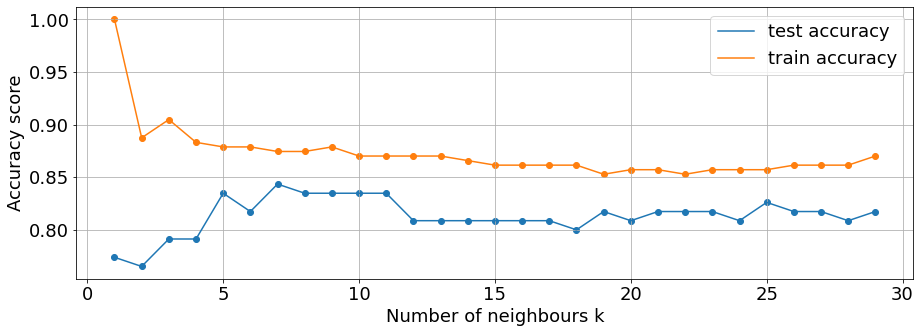

In [14]:
plt.figure(figsize=(15,5))

plt.plot(range(1,max_k), acc_test, label='test accuracy');
plt.plot(range(1,max_k), acc_train, label='train accuracy');

plt.scatter(range(1,max_k), acc_test);
plt.scatter(range(1,max_k), acc_train);

plt.xlabel('Number of neighbours k')
plt.ylabel('Accuracy score');
plt.grid()
plt.legend();

In [15]:
np.argmax(acc_test)

6

In [16]:
acc_test[np.argmax(acc_test)]

0.8434782608695652

In [17]:
best_clf_knn = KNeighborsClassifier(6)
best_clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
k =5
x <- female
x <- 2/5 = 40%
x <- 3/5 = 60%
2 males
3 females



In [ ]:
k = 5

x - height, sex, age

weights = [50, 61, 70, 54, 49]

x <- mean([50, 61, 70, 54, 49])

# Questions

1. KNN generalization. How good will be predictions on kids?
2. How to get probability instead of class label?
3. How to adapt for regression? 
4. What if we have same number of different classes amongst neighbours (e.g. 2 "male" and 2 "female" )?

# Other parameters KNN

1. Choose distance metric (euclidean, minkowski, cosine, etc.).
2. Samples weighting.

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df_kids = df.query('age<=18')

In [19]:
y_pred = best_clf_knn.predict(df_kids[['height', 'weight']])
print(accuracy_score(df_kids['male'], y_pred))

0.5303030303030303
